In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls gdrive/MyDrive/Figure\ Layout\ and\ Classification\ Independent\ Study/data/FigureFiles

graphs	skyImages  spectra


In [ ]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from glob import glob
print(cv2.__version__)
# import pytesseract
import sklearn
# assert sklearn.__version__ >= "0.20"

# import math
from PIL import Image, ImageOps, ImageFilter, ImageDraw

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

4.1.2


In [ ]:
# Trying Binary Classification on our datset:
# Fething the data first:

image_files = glob('gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/*')
image_files

['gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/spectra',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/skyImages',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/graphs']

In [ ]:
image_files = glob('gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/*/*')
image_files[:3]

['gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/spectra/1bcbeacf-997e-4907-a648-6000bd15eabc_s00.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/spectra/2bb184da-6850-416c-9fe2-34f3a5428a34_s00.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/spectra/0dc49379-c0dc-47eb-8da3-689726b0e5d1_s00.jpeg']

In [ ]:
len(image_files)

54

In [ ]:
# Data Preprocessing:
# Defining our X is our data and y is our target variable

X_ours = np.zeros([len(image_files), 112 * 112])
X_ours.shape

(54, 12544)

In [ ]:
for i, image_file in enumerate(image_files):
    # open the file and turn it into a grayscale'd numpy array
    img_ours = np.array(Image.open(image_file).convert('L'))
    # invert the grayscale
    img_invert = cv2.bitwise_not(img_ours)
    # resize
    img_resize = cv2.resize(img_invert, (112, 112))
    # flatten
    img_flatten = img_resize.flatten()
    # store
    X_ours[i,:] = img_flatten

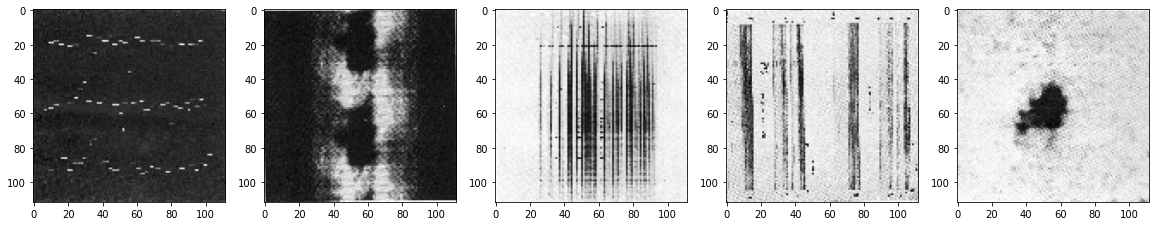

In [ ]:
# let's take a look!
fig, ax = plt.subplots(1,5,figsize=(20,6))

for i in range(5):
    ax[i].imshow(X_ours[i,:].reshape(112,112),cmap='binary')
plt.show()

In [ ]:
y_ours = np.zeros(len(image_files)).astype('uint8')
y_ours

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
LABELS = []
for i, image_file in enumerate(image_files):
    #print(image_file.split('/')[-2])
    LABELS.append(image_file.split('/')[-2])
LABELS = np.unique(LABELS)
LABELS

array(['graphs', 'skyImages', 'spectra'], dtype='<U9')

In [ ]:
LABELS.tolist().index('spectra')

2

In [ ]:
LABELS.tolist().index('graphs')

0

In [ ]:
for i, image_file in enumerate(image_files):
    label = image_file.split('/')[-2] # label for each image file from its full name
    #print(label)
    y_ours[i] = LABELS.tolist().index(label) # in the LABELS list, what index does this "label" mean?

In [ ]:
y_ours

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
image_files[0]

'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles/spectra/1bcbeacf-997e-4907-a648-6000bd15eabc_s00.jpeg'

In [ ]:
inds = np.arange(len(y_ours))
inds

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [ ]:
np.random.shuffle(inds)
inds

array([15, 30, 43, 32, 33, 48, 23,  2,  9,  6, 50, 39, 42, 12, 11, 26,  7,
       37, 36, 40, 28, 10, 51, 20, 46,  8, 44, 35, 13, 52, 17, 27, 38, 25,
       41,  0, 34, 29, 53, 19, 24, 47, 21, 14,  5,  4, 45, 49,  1, 31, 16,
        3, 18, 22])

In [ ]:
X_ours = X_ours[inds,:]
X_ours

array([[  0.,   6.,   3., ...,  19.,  23.,   0.],
       [ 22.,  32.,  22., ..., 194., 200., 199.],
       [ 59.,  61.,  60., ...,  88.,  79.,  84.],
       ...,
       [  4.,   9.,   7., ...,   6.,  21.,   9.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  4.,   4.,   4., ...,   4.,   4.,   4.]])

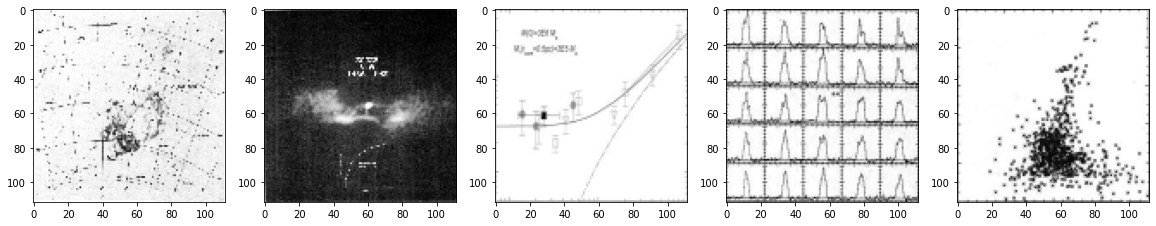

In [ ]:
# let's take a look!
fig, ax = plt.subplots(1,5,figsize=(20,6))

for i in range(5):
    ax[i].imshow(X_ours[i,:].reshape(112,112),cmap='binary')
plt.show()

In [ ]:
len(X_ours)

54

In [ ]:
X_ours[0]

array([ 0.,  6.,  3., ..., 19., 23.,  0.])

In [ ]:
y_ours = y_ours[inds]
y_ours

array([1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2,
       0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1,
       2, 2, 0, 0, 2, 0, 1, 2, 1, 1], dtype=uint8)

In [ ]:
len(y_ours)

54

In [ ]:
X_train, X_test, y_train, y_test = X_ours[:44], X_ours[44:], y_ours[:44], y_ours[44:]

In [ ]:
X_train
len(X_train) # 44
len(X_test) # 10

10

In [ ]:
y_test[0] # 1 is sky Images

2

In [ ]:
X_train.shape

(44, 12544)

In [ ]:
X_test.shape

(10, 12544)

In [ ]:
y_train.shape

(44,)

In [ ]:
y_test.shape

(10,)

# 0 is spectra, 1 is sky Images and 2 is graphs

In [ ]:
# 0 is spectra, 1 is sky Images and 2 is graphs

y_train[0] # 0 is spectra

1

In [ ]:
y_test[0]

2

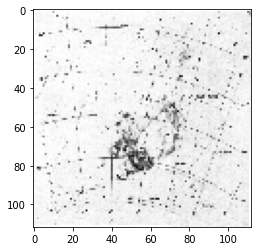

In [ ]:
some_img = X_ours[0]
img = some_img.reshape(112, 112)
plt.imshow(img, cmap='binary');

## Training a Binary Classifier

In [ ]:
y_train_sky = (y_train == 0) # 0 is spectra
y_test_sky = (y_test == 0)

In [ ]:
# SGD Classifier:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)
sgd_clf.fit(X_train, y_train_sky)

SGDClassifier(eta0=0.1, random_state=42)

In [ ]:
y_pred = sgd_clf.predict([some_img])
y_pred

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_sky, cv=3, scoring="accuracy")

array([1.        , 0.86666667, 0.85714286])

## Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_sky, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_sky, y_train_pred)

array([[23,  1],
       [ 3, 17]])

## Precision and Recall of SGD Clf:

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_sky, y_train_pred)

0.9444444444444444

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train_sky)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict([some_img])
y_pred

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf, X_train, y_train_sky, cv=3, scoring="accuracy")

array([0.93333333, 0.86666667, 0.92857143])

# Precision and Recall of Random Forest Clf:

In [ ]:
precision_score(y_train_sky, y_train_pred)

0.9444444444444444

In [ ]:
len(y_train_sky[y_train_sky])/len(y_train_sky)

0.45454545454545453

# Multi-Class Classification:

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:44], y_train[:44]) # y_train, not y_train_sky
svm_clf.predict([some_img])

array([1], dtype=uint8)

In [ ]:
some_img_scores = svm_clf.decision_function([some_img])
some_img_scores

array([[ 0.94444444,  2.21210399, -0.20259435]])

In [ ]:
np.argmax(some_img_scores)

1

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:44], y_train[:44])
ovr_clf.predict([some_img])

array([1], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

3

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_img])

array([1], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_img])

array([[-1.16977485e+08,  1.74770210e+08, -1.53505026e+08]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.53333333, 0.86666667, 0.57142857])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.6, 0.6, 0.5])

# Error Analysis:

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[17,  1,  2],
       [ 1,  2, 12],
       [ 0,  3,  6]])

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

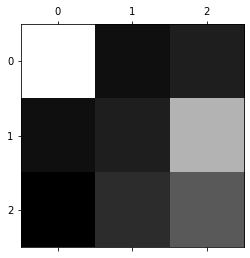

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

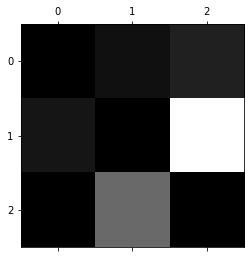

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

---------

# Chapter 10: Image Clf, via Keras and Tensorflow:

In [ ]:
# pip install -U keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
image_files = glob('gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/*')
image_files

['gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/Graph',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/SkyNoCoords',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/Spectra']

In [ ]:
image_files_full = glob('gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/*/*')
image_files_full[:3]

['gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/Graph/e2bfccca-3a86-429e-a60a-d2d361b750bb_s01.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/Graph/314b1e39-9e3d-4aea-99a5-c488cb6b56c9_s01.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/Graph/95578e05-2adc-4a29-a34a-77d5b456ea16_s01.jpeg']

In [ ]:
len(image_files_full)

2054

In [ ]:
X_ours = np.zeros([len(image_files_full), 128, 128])
X_ours.shape

(2054, 128, 128)

In [ ]:
X_ours

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
for i, image_file in enumerate(image_files_full):
    # open the file and turn it into a grayscale'd numpy array
    img_ours = np.array(Image.open(image_file).convert('L'))
    # invert the grayscale
    img_invert = cv2.bitwise_not(img_ours)
    # resize
    img_resize = cv2.resize(img_invert, (128, 128))
    # our images
    X_ours[i] = img_resize

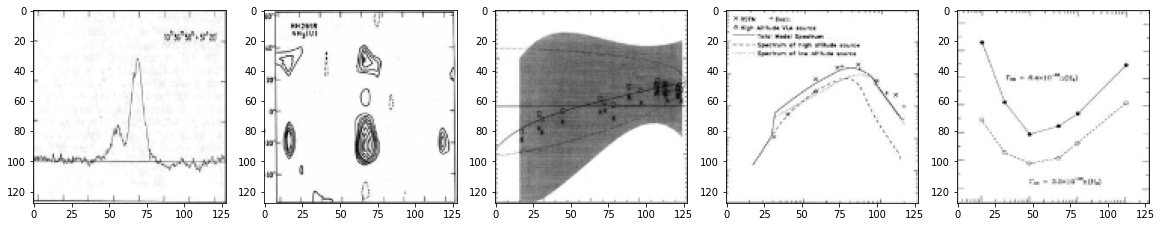

In [ ]:
# let's take a look!
fig, ax = plt.subplots(1,5,figsize=(20,6))

for i in range(5):
    ax[i].imshow(X_ours[i,:],cmap='binary')
plt.show()

In [ ]:
len(X_ours)

2054

In [ ]:
X_ours.shape

(2054, 128, 128)

In [ ]:
y_ours = np.zeros(len(image_files_full)).astype('uint8')
y_ours

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
LABELS = []
for i, image_file in enumerate(image_files_full):
    #print(image_file.split('/')[-2])
    LABELS.append(image_file.split('/')[-2])
LABELS = np.unique(LABELS)
LABELS

array(['Graph', 'SkyNoCoords', 'Spectra'], dtype='<U11')

In [ ]:
for i, image_file in enumerate(image_files_full):
    label = image_file.split('/')[-2]
    y_ours[i] = LABELS.tolist().index(label)
y_ours

array([0, 0, 0, ..., 2, 2, 2], dtype=uint8)

In [ ]:
len(y_ours)

2054

In [ ]:
image_files_full[0]

'gdrive/MyDrive/Figure Layout and Classification Independent Study/data/FigureFiles_Large/Graph/e2bfccca-3a86-429e-a60a-d2d361b750bb_s01.jpeg'

In [ ]:
ind = np.arange(len(y_ours))
ind

array([   0,    1,    2, ..., 2051, 2052, 2053])

In [ ]:
np.random.shuffle(ind)
ind

array([ 690, 1624,  761, ...,   71, 1745,  848])

In [ ]:
X_ours = X_ours[ind,:]
X_ours

array([[[251., 253., 250., ..., 254., 244., 238.],
        [249., 252., 248., ..., 241., 245., 241.],
        [250., 253., 201., ..., 220., 243., 241.],
        ...,
        [247., 139.,  71., ..., 109., 127., 227.],
        [247., 252., 152., ..., 240., 242., 227.],
        [249., 249., 254., ..., 251., 251., 226.]],

       [[ 24.,  33.,  50., ...,  55.,  51.,  25.],
        [ 38.,  50.,  59., ...,  67.,  62.,  29.],
        [ 63.,  64.,  55., ...,  70.,  67.,  30.],
        ...,
        [ 37.,  55.,  43., ...,  68.,  59.,  26.],
        [ 33.,  49.,  46., ...,  74.,  69.,  44.],
        [ 34.,  41.,  45., ...,  57.,  46.,  28.]],

       [[ 91., 140., 168., ..., 166., 171., 140.],
        [147., 247., 254., ..., 253., 250., 207.],
        [158., 244., 253., ..., 253., 253., 210.],
        ...,
        [194., 251., 250., ..., 225., 232., 200.],
        [190., 246., 253., ..., 218., 220., 187.],
        [150., 190., 193., ..., 166., 173., 153.]],

       ...,

       [[118., 103.,  99

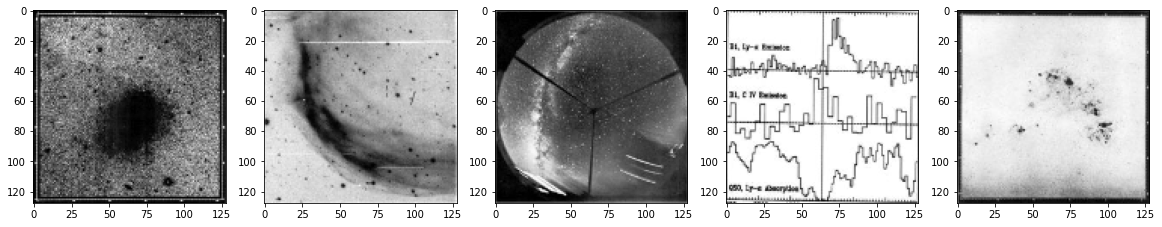

In [ ]:
# let's take a look!
fig, ax = plt.subplots(1,5,figsize=(20,6))

for i in range(5):
    ax[i].imshow(X_ours[i,:].reshape(128,128),cmap='binary')
plt.show()

In [ ]:
len(X_ours)

2054

In [ ]:
y_ours = y_ours[ind]
y_ours

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [ ]:
np.unique(y_ours)

array([0, 1, 2], dtype=uint8)

In [ ]:
len(X_ours)

2054

In [ ]:
len(y_ours)

2054

In [ ]:
# X_valid, X_train = X_train_full[:1438] / 255., X_train_full[1438:1850] / 255.
# y_valid, y_train = y_train_full[1438:1850], y_train_full[1438:]
# X_test = X_test / 255.

In [ ]:
# Data Split: training 70%, validation 20%, and testing data 10%
train = 0.7
valid = 0.2
test = 0.1

ind_train = round(train*len(y_ours))

ind_valid = ind_train + round(valid*len(y_ours))


# train_set = y_ours[:ind_train]
# valid_set = y_ours[ind_train:ind_valid]
# test_set = y_ours[ind_valid:]

In [ ]:
X_train = X_ours[:ind_train] / 255.
X_valid = X_ours[ind_train:ind_valid] / 255.
X_test = X_ours[ind_valid:] / 255.

In [ ]:
y_train = y_ours[:ind_train]
y_valid = y_ours[ind_train:ind_valid]
y_test = y_ours[ind_valid:]

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
X_train

array([[[0.98431373, 0.99215686, 0.98039216, ..., 0.99607843,
         0.95686275, 0.93333333],
        [0.97647059, 0.98823529, 0.97254902, ..., 0.94509804,
         0.96078431, 0.94509804],
        [0.98039216, 0.99215686, 0.78823529, ..., 0.8627451 ,
         0.95294118, 0.94509804],
        ...,
        [0.96862745, 0.54509804, 0.27843137, ..., 0.42745098,
         0.49803922, 0.89019608],
        [0.96862745, 0.98823529, 0.59607843, ..., 0.94117647,
         0.94901961, 0.89019608],
        [0.97647059, 0.97647059, 0.99607843, ..., 0.98431373,
         0.98431373, 0.88627451]],

       [[0.09411765, 0.12941176, 0.19607843, ..., 0.21568627,
         0.2       , 0.09803922],
        [0.14901961, 0.19607843, 0.23137255, ..., 0.2627451 ,
         0.24313725, 0.11372549],
        [0.24705882, 0.25098039, 0.21568627, ..., 0.2745098 ,
         0.2627451 , 0.11764706],
        ...,
        [0.14509804, 0.21568627, 0.16862745, ..., 0.26666667,
         0.23137255, 0.10196078],
        [0.1

In [ ]:
X_train.shape

(1438, 128, 128)

In [ ]:
X_test.shape

(205, 128, 128)

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
y_train.shape

(1438,)

In [ ]:
y_test.shape

(205,)

In [ ]:
y_ours[:3]

array([1, 1, 1], dtype=uint8)

# Try to balance the dataset, eqaul number of classes Graph, SkyNoCoords, Spectra

In [ ]:
# check the dataset if it's Balanced
# Check which class is it predicting

# Parsed down the training set eqaul numbers of Spectra, skynocoords, Graphs, 512 images for each(Training and testing)X_train, X_test, y_train, y_test
# 683 images in Spectra, skynocoords, Graphs in each class
# Data Augumentation
# Auto Encoders

# Checking what number of classes are there in the training set

# 4. Stratified There's a parameter stratify in method train_test_split to which you can give the labels list e.g. :

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     stratify=y,
#                                                     test_size=0.2)

In [ ]:
LABELS

array(['Graph', 'SkyNoCoords', 'Spectra'], dtype='<U11')

In [ ]:
len(y_ours)

2054

In [ ]:
y_ours[y_ours==0] # graphs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=uint8)

In [ ]:
type(y_ours)

numpy.ndarray

In [ ]:
len(y_ours[y_ours==0])

180

In [ ]:
len(y_ours[y_ours==0]) / len(y_ours)
# 9% of the data is graphs

0.08763388510223953

In [ ]:
y_ours[y_ours==1]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
len(y_ours[y_ours==1]) / len(y_ours) # 80% sky coordinates

0.7804284323271665

In [ ]:
len(y_ours[y_ours==2]) / len(y_ours) # Spectra, 13% of the data is spectra

0.13193768257059396

In [ ]:
len(y_train[y_train==1]) / len(y_train)

0.7767732962447844

In [ ]:
# import seaborn as sns

# def bar_perc1(data,z):
#     # Taking length of data
#     total = len(data[z])

#     plt.figure(figsize=(15,5))
#     # Plotting Univariate Categorical Varaible
#     ax = sns.countplot(data[z], palette='Paired')

#     for i in ax.patches:
#         # The values that we will get on top of each bar
#         percentage = '{:.1f}%'.format(100*i.get_height()/total)
#         # Calulating the Width of the bar
#         x = i.get_x() + i.get_width()/ 2 - 0.05
#         # Calulating the Height of the bar
#         y = i.get_y() + i.get_height()

#         ax.annotate(percentage,(x,y),size=12)

#     plt.show()

In [ ]:
# sns.countplot(y_ours, hue=y_ours).set(title='Number of Instances in Each Class');
# plt.legend(labels={0:'Graphs', 1:'Sky Coordinates', 2:'Spectra'})
# plt.legend(labels=('Graphs', 'Sky Coordinates', 'Spectra'))
# groupby(y_ours)

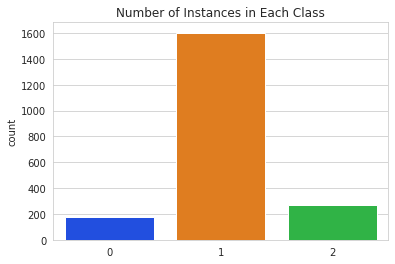

In [ ]:
# 0 = Graphs, 1 = Sky Coordinates, 2 = Spectra
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x=y_ours, palette='bright').set(title='Number of Instances in Each Class');

# Model:

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128, 128]))
model.add(keras.layers.Dense(411, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(411, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 411)               6734235   
                                                                 
 dense_1 (Dense)             (None, 100)               41200     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,776,445
Trainable params: 6,776,445
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00622079, -0.00223007, -0.00556135, ..., -0.01126961,
         0.01167808, -0.00854337],
       [-0.00047226,  0.00654938, -0.00824227, ...,  0.01366168,
         0.00241017,  0.00291236],
       [-0.0168153 ,  0.00549954, -0.00691955, ...,  0.00690035,
         0.00137215, -0.01420125],
       ...,
       [-0.01754692, -0.01097398, -0.01510207, ..., -0.01075962,
        -0.00446715, -0.01651748],
       [-0.00908651,  0.01732858, -0.01194754, ...,  0.00768239,
         0.01236759,  0.00378694],
       [-0.01385241,  0.01181021,  0.01793806, ...,  0.00779258,
        -0.01456401,  0.00615559]], dtype=float32)

In [ ]:
weights.shape

(16384, 411)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(411,)

In [ ]:
np.unique(y_train)

array([0, 1, 2], dtype=uint8)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(X_valid, y_valid))

Epoch 1/150
45/45 [==============================] - 3s 45ms/step - loss: 0.8065 - accuracy: 0.7698 - val_loss: 0.7910 - val_accuracy: 0.7908
Epoch 2/150
45/45 [==============================] - 2s 39ms/step - loss: 0.6366 - accuracy: 0.8248 - val_loss: 0.6033 - val_accuracy: 0.8054
Epoch 3/150
45/45 [==============================] - 2s 38ms/step - loss: 0.5975 - accuracy: 0.8171 - val_loss: 0.6655 - val_accuracy: 0.8200
Epoch 4/150
45/45 [==============================] - 2s 38ms/step - loss: 0.5510 - accuracy: 0.8359 - val_loss: 0.5666 - val_accuracy: 0.8151
Epoch 5/150
45/45 [==============================] - 2s 39ms/step - loss: 0.5155 - accuracy: 0.8435 - val_loss: 0.5854 - val_accuracy: 0.8127
Epoch 6/150
45/45 [==============================] - 2s 44ms/step - loss: 0.5101 - accuracy: 0.8540 - val_loss: 0.6816 - val_accuracy: 0.8175
Epoch 7/150
45/45 [==============================] - 2s 38ms/step - loss: 0.4812 - accuracy: 0.8595 - val_loss: 0.6800 - val_accuracy: 0.8175
Epoch 

In [ ]:
history.params

{'epochs': 150, 'steps': 45, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

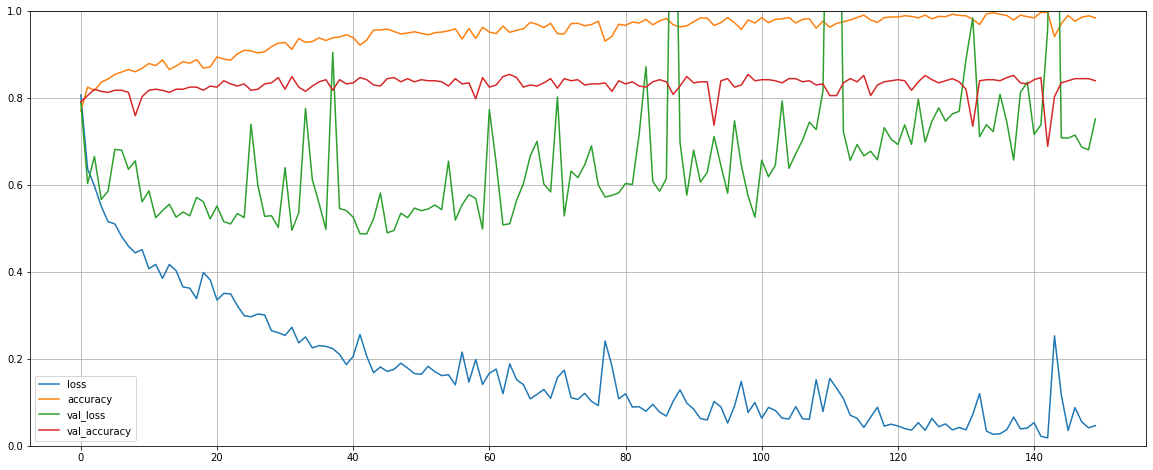

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 15ms/step - loss: 0.5013 - accuracy: 0.8927


[0.5013278722763062, 0.8926829099655151]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# model.predict_proba(X_new)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([1, 1, 1])

In [ ]:
# np.array(class_names)[y_pred]

In [ ]:
y_new = y_test[:3]
y_new

array([1, 1, 1], dtype=uint8)

# Hyperparameter Tuning:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128, 128]))
model.add(keras.layers.Dense(411, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
def build_model(n_hidden=1, n_neurons=100, learning_rate=3e-3, nOutputs=3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[128, 128]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="elu", kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(nOutputs, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999),
                  metrics=["accuracy"])
    return model

In [ ]:
from keras import activations
from sklearn import metrics
# Function to create model, required for KerasClassifier
def create_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[128, 128], optimizer='rmsprop', init='glorot_uniform'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[128, 128]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(3))#, activation="softmax"))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])#may be sparse_categorical_crossentropy, bcoz we have 3 classes rather than binary_crossentropy
    return model

In [ ]:
# Compile model:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
model = create_model()
model

In [ ]:
# keras.callbacks.EarlyStopping?

In [ ]:
keras_clf.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
45/45 [==============================] - 1s 22ms/step - loss: 9.6111 - accuracy: 0.7010 - val_loss: 2.2112 - val_accuracy: 0.3163
Epoch 2/100
45/45 [==============================] - 1s 18ms/step - loss: 1.2758 - accuracy: 0.7726 - val_loss: 0.7418 - val_accuracy: 0.8224
Epoch 3/100
45/45 [==============================] - 1s 17ms/step - loss: 0.5425 - accuracy: 0.8331 - val_loss: 0.5476 - val_accuracy: 0.8200
Epoch 4/100
45/45 [==============================] - 1s 19ms/step - loss: 0.4370 - accuracy: 0.8554 - val_loss: 0.6422 - val_accuracy: 0.8200
Epoch 5/100
45/45 [==============================] - 1s 18ms/step - loss: 1.1154 - accuracy: 0.7650 - val_loss: 1.0423 - val_accuracy: 0.2482
Epoch 6/100
45/45 [==============================] - 1s 19ms/step - loss: 0.5771 - accuracy: 0.7962 - val_loss: 0.6258 - val_accuracy: 0.7908
Epoch 7/100
45/45 [==============================] - 1s 23ms/step - loss: 0.5098 - accuracy: 0.8380 - val_loss: 0.7308 - val_accuracy: 0.7883
Epoch 

In [ ]:
acc_test = keras_clf.score(X_test, y_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.4696 - accuracy: 0.8537


In [ ]:
y_pred = keras_clf.predict(X_new)
y_pred

array([1, 1, 1], dtype=uint8)

# Randomized Search CV:

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 16ms/step - loss: 19.2680 - accuracy: 0.6597 - val_loss: 5.4461 - val_accuracy: 0.7883
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 3.5178 - accuracy: 0.4363 - val_loss: 1.0463 - val_accuracy: 0.2968
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.7463 - val_loss: 0.5949 - val_accuracy: 0.7810
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5707 - accuracy: 0.8069 - val_loss: 0.6435 - val_accuracy: 0.7883
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5528 - accuracy: 0.8100 - val_loss: 0.5845 - val_accuracy: 0.7883
Epoch 6/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5355 - accuracy: 0.8142 - val_loss: 0.6819 - val_accuracy: 0.7932
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.5267 - accuracy: 0.8184 - val_loss: 0.5816 - val_accuracy: 0.7883
Epoch 8/100
30/30 [====

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 15ms/step - loss: 4.7733 - accuracy: 0.6465 - val_loss: 1.0388 - val_accuracy: 0.0779
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 0.7406 - accuracy: 0.7591 - val_loss: 0.7124 - val_accuracy: 0.7640
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6901 - accuracy: 0.7769 - val_loss: 0.6984 - val_accuracy: 0.7640
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6847 - accuracy: 0.7769 - val_loss: 0.7006 - val_accuracy: 0.7640
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.7769 - val_loss: 0.6999 - val_accuracy: 0.7640
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6837 - accuracy: 0.7769 - val_loss: 0.6997 - val_accuracy: 0.7640
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6835 - accuracy: 0.7769 - val_loss: 0.6992 - val_accuracy: 0.7640
Epoch 8/100
30/30 [=====

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 13ms/step - loss: 10.8545 - accuracy: 0.5297 - val_loss: 0.6960 - val_accuracy: 0.7859
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 0.5894 - accuracy: 0.8217 - val_loss: 0.6374 - val_accuracy: 0.7908
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5570 - accuracy: 0.8279 - val_loss: 0.6310 - val_accuracy: 0.7956
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5973 - accuracy: 0.8217 - val_loss: 0.6469 - val_accuracy: 0.7835
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.5666 - accuracy: 0.8248 - val_loss: 0.6291 - val_accuracy: 0.7908
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 0.5611 - accuracy: 0.8269 - val_loss: 0.6295 - val_accuracy: 0.7908
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.5608 - accuracy: 0.8269 - val_loss: 0.6305 - val_accuracy: 0.7908
Epoch 8/100
30/30 [====

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 23ms/step - loss: 23.0456 - accuracy: 0.6190 - val_loss: 5.7030 - val_accuracy: 0.7883
Epoch 2/100
30/30 [==============================] - 1s 19ms/step - loss: 2.4619 - accuracy: 0.7276 - val_loss: 1.2896 - val_accuracy: 0.7786
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 1.0669 - accuracy: 0.7547 - val_loss: 1.9866 - val_accuracy: 0.8151
Epoch 4/100
30/30 [==============================] - 1s 19ms/step - loss: 0.9815 - accuracy: 0.7683 - val_loss: 0.9132 - val_accuracy: 0.8127
Epoch 5/100
30/30 [==============================] - 1s 19ms/step - loss: 0.7313 - accuracy: 0.8027 - val_loss: 0.7476 - val_accuracy: 0.6740
Epoch 6/100
30/30 [==============================] - 1s 21ms/step - loss: 0.8808 - accuracy: 0.7850 - val_loss: 0.7733 - val_accuracy: 0.8151
Epoch 7/100
30/30 [==============================] - 1s 21ms/step - loss: 0.6127 - accuracy: 0.8142 - val_loss: 0.8597 - val_accuracy: 0.7883
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 25ms/step - loss: 20.1957 - accuracy: 0.6684 - val_loss: 3.5163 - val_accuracy: 0.5596
Epoch 2/100
30/30 [==============================] - 1s 21ms/step - loss: 4.3017 - accuracy: 0.7289 - val_loss: 2.9581 - val_accuracy: 0.4818
Epoch 3/100
30/30 [==============================] - 1s 21ms/step - loss: 2.7198 - accuracy: 0.7289 - val_loss: 1.2004 - val_accuracy: 0.8005
Epoch 4/100
30/30 [==============================] - 1s 20ms/step - loss: 0.8265 - accuracy: 0.7956 - val_loss: 0.7382 - val_accuracy: 0.7981
Epoch 5/100
30/30 [==============================] - 1s 19ms/step - loss: 1.3964 - accuracy: 0.7716 - val_loss: 1.2153 - val_accuracy: 0.8078
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 1.4004 - accuracy: 0.7894 - val_loss: 0.8567 - val_accuracy: 0.7981
Epoch 7/100
30/30 [==============================] - 1s 20ms/step - loss: 0.5624 - accuracy: 0.8624 - val_loss: 0.5899 - val_accuracy: 0.8175
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 27ms/step - loss: 21.6138 - accuracy: 0.6653 - val_loss: 6.2076 - val_accuracy: 0.8029
Epoch 2/100
30/30 [==============================] - 1s 18ms/step - loss: 7.5521 - accuracy: 0.7362 - val_loss: 3.5503 - val_accuracy: 0.7956
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 2.8690 - accuracy: 0.7278 - val_loss: 1.0554 - val_accuracy: 0.7981
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 0.8006 - accuracy: 0.8008 - val_loss: 3.3959 - val_accuracy: 0.7981
Epoch 5/100
30/30 [==============================] - 1s 18ms/step - loss: 1.4958 - accuracy: 0.8092 - val_loss: 0.6105 - val_accuracy: 0.8078
Epoch 6/100
30/30 [==============================] - 1s 21ms/step - loss: 0.4704 - accuracy: 0.8467 - val_loss: 0.8748 - val_accuracy: 0.8029
Epoch 7/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3537 - accuracy: 0.8874 - val_loss: 0.5551 - val_accuracy: 0.8102
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 21ms/step - loss: 1.4650 - accuracy: 0.7484 - val_loss: 0.5736 - val_accuracy: 0.7956
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 0.5400 - accuracy: 0.8205 - val_loss: 0.5746 - val_accuracy: 0.7932
Epoch 3/100
30/30 [==============================] - 0s 15ms/step - loss: 0.5241 - accuracy: 0.8267 - val_loss: 0.5697 - val_accuracy: 0.7981
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4930 - accuracy: 0.8330 - val_loss: 0.5912 - val_accuracy: 0.7981
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4721 - accuracy: 0.8372 - val_loss: 0.5675 - val_accuracy: 0.7981
Epoch 6/100
30/30 [==============================] - 0s 14ms/step - loss: 0.4540 - accuracy: 0.8424 - val_loss: 0.5438 - val_accuracy: 0.8005
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 0.4425 - accuracy: 0.8403 - val_loss: 0.5422 - val_accuracy: 0.8029
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 20ms/step - loss: 1.3952 - accuracy: 0.7164 - val_loss: 0.7630 - val_accuracy: 0.7883
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 0.5620 - accuracy: 0.8113 - val_loss: 0.5804 - val_accuracy: 0.7835
Epoch 3/100
30/30 [==============================] - 0s 14ms/step - loss: 0.5147 - accuracy: 0.8123 - val_loss: 0.6012 - val_accuracy: 0.8005
Epoch 4/100
30/30 [==============================] - 0s 16ms/step - loss: 0.4842 - accuracy: 0.8269 - val_loss: 0.6694 - val_accuracy: 0.8005
Epoch 5/100
30/30 [==============================] - 0s 13ms/step - loss: 0.4732 - accuracy: 0.8269 - val_loss: 0.5292 - val_accuracy: 0.8054
Epoch 6/100
30/30 [==============================] - 0s 14ms/step - loss: 0.4434 - accuracy: 0.8467 - val_loss: 0.5406 - val_accuracy: 0.8029
Epoch 7/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4203 - accuracy: 0.8478 - val_loss: 0.5895 - val_accuracy: 0.8054
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 22ms/step - loss: 1.9227 - accuracy: 0.6684 - val_loss: 1.4430 - val_accuracy: 0.7689
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 0.7998 - accuracy: 0.7967 - val_loss: 0.5606 - val_accuracy: 0.8029
Epoch 3/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4767 - accuracy: 0.8509 - val_loss: 0.5081 - val_accuracy: 0.8127
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.5007 - accuracy: 0.8425 - val_loss: 0.5317 - val_accuracy: 0.8005
Epoch 5/100
30/30 [==============================] - 0s 14ms/step - loss: 0.4539 - accuracy: 0.8603 - val_loss: 0.4983 - val_accuracy: 0.8200
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4005 - accuracy: 0.8634 - val_loss: 0.5373 - val_accuracy: 0.8102
Epoch 7/100
30/30 [==============================] - 0s 14ms/step - loss: 0.3658 - accuracy: 0.8676 - val_loss: 0.5026 - val_accuracy: 0.8200
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 2s 23ms/step - loss: 2.7336 - accuracy: 0.6983 - val_loss: 1.6455 - val_accuracy: 0.2701
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 0.8342 - accuracy: 0.7568 - val_loss: 0.6105 - val_accuracy: 0.7786
Epoch 3/100
30/30 [==============================] - 0s 16ms/step - loss: 0.5506 - accuracy: 0.8100 - val_loss: 0.6936 - val_accuracy: 0.8102
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.5749 - accuracy: 0.8111 - val_loss: 0.6041 - val_accuracy: 0.7835
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 0.5355 - accuracy: 0.8309 - val_loss: 0.6752 - val_accuracy: 0.7421
Epoch 6/100
30/30 [==============================] - 0s 16ms/step - loss: 0.4791 - accuracy: 0.8351 - val_loss: 0.5541 - val_accuracy: 0.8102
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 0.4351 - accuracy: 0.8455 - val_loss: 0.6336 - val_accuracy: 0.8151
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 26ms/step - loss: 2.8087 - accuracy: 0.6934 - val_loss: 1.9624 - val_accuracy: 0.7908
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 1.2050 - accuracy: 0.7560 - val_loss: 0.7798 - val_accuracy: 0.7421
Epoch 3/100
30/30 [==============================] - 0s 15ms/step - loss: 0.8351 - accuracy: 0.7591 - val_loss: 0.7137 - val_accuracy: 0.7956
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4733 - accuracy: 0.8478 - val_loss: 0.7914 - val_accuracy: 0.8005
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 0.5418 - accuracy: 0.8311 - val_loss: 0.6637 - val_accuracy: 0.8054
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4139 - accuracy: 0.8530 - val_loss: 0.5373 - val_accuracy: 0.8127
Epoch 7/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4312 - accuracy: 0.8582 - val_loss: 0.5670 - val_accuracy: 0.8102
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 25ms/step - loss: 2.1945 - accuracy: 0.7195 - val_loss: 0.7636 - val_accuracy: 0.7956
Epoch 2/100
30/30 [==============================] - 1s 18ms/step - loss: 0.9493 - accuracy: 0.8186 - val_loss: 1.6968 - val_accuracy: 0.2968
Epoch 3/100
30/30 [==============================] - 0s 17ms/step - loss: 0.6605 - accuracy: 0.8092 - val_loss: 0.7301 - val_accuracy: 0.7981
Epoch 4/100
30/30 [==============================] - 0s 16ms/step - loss: 0.7025 - accuracy: 0.8248 - val_loss: 1.7182 - val_accuracy: 0.8127
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 0.8976 - accuracy: 0.8269 - val_loss: 0.6194 - val_accuracy: 0.7835
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3959 - accuracy: 0.8728 - val_loss: 0.6643 - val_accuracy: 0.8127
Epoch 7/100
30/30 [==============================] - 1s 18ms/step - loss: 0.3148 - accuracy: 0.8947 - val_loss: 0.5344 - val_accuracy: 0.8078
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 15ms/step - loss: 17.3501 - accuracy: 0.6931 - val_loss: 4.9729 - val_accuracy: 0.7883
Epoch 2/100
30/30 [==============================] - 0s 10ms/step - loss: 4.5593 - accuracy: 0.7944 - val_loss: 8.7447 - val_accuracy: 0.7981
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: 3.1000 - accuracy: 0.7829 - val_loss: 4.5147 - val_accuracy: 0.7883
Epoch 4/100
30/30 [==============================] - 0s 10ms/step - loss: 6.4480 - accuracy: 0.7797 - val_loss: 16.4197 - val_accuracy: 0.3236
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 7.5020 - accuracy: 0.7474 - val_loss: 5.9003 - val_accuracy: 0.7835
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 6.6699 - accuracy: 0.7693 - val_loss: 4.6840 - val_accuracy: 0.8200
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 7.4852 - accuracy: 0.7933 - val_loss: 13.6231 - val_accuracy: 0.7226
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 13ms/step - loss: 17.1214 - accuracy: 0.6997 - val_loss: 4.4650 - val_accuracy: 0.7956
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 8.9349 - accuracy: 0.7518 - val_loss: 5.5342 - val_accuracy: 0.5693
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 12.4183 - accuracy: 0.7185 - val_loss: 19.6632 - val_accuracy: 0.7956
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 6.5046 - accuracy: 0.7737 - val_loss: 3.0639 - val_accuracy: 0.7932
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 5.3955 - accuracy: 0.7800 - val_loss: 5.1645 - val_accuracy: 0.8005
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 5.4971 - accuracy: 0.7987 - val_loss: 4.6893 - val_accuracy: 0.8054
Epoch 7/100
30/30 [==============================] - 0s 10ms/step - loss: 2.7520 - accuracy: 0.8498 - val_loss: 3.7140 - val_accuracy: 0.8151
Epoch 8/100
30/30 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 15ms/step - loss: 19.8313 - accuracy: 0.7091 - val_loss: 13.2404 - val_accuracy: 0.7299
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 3.9232 - accuracy: 0.7883 - val_loss: 9.8040 - val_accuracy: 0.3796
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: 5.4492 - accuracy: 0.7769 - val_loss: 13.2616 - val_accuracy: 0.8078
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 3.3407 - accuracy: 0.8332 - val_loss: 14.4694 - val_accuracy: 0.7883
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 6.8943 - accuracy: 0.7685 - val_loss: 6.7705 - val_accuracy: 0.8078
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 4.8110 - accuracy: 0.8478 - val_loss: 7.6194 - val_accuracy: 0.7908
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 6.4938 - accuracy: 0.8332 - val_loss: 27.0457 - val_accuracy: 0.6229
Epoch 8/100
30/3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 17ms/step - loss: 3.6438 - accuracy: 0.6743 - val_loss: 1.4129 - val_accuracy: 0.7762
Epoch 2/100
30/30 [==============================] - 0s 12ms/step - loss: 1.1671 - accuracy: 0.7244 - val_loss: 1.2004 - val_accuracy: 0.7956
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.9274 - accuracy: 0.7902 - val_loss: 3.8398 - val_accuracy: 0.8054
Epoch 4/100
30/30 [==============================] - 0s 12ms/step - loss: 2.5469 - accuracy: 0.7140 - val_loss: 1.5963 - val_accuracy: 0.8054
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 1.3250 - accuracy: 0.7276 - val_loss: 0.9976 - val_accuracy: 0.4355
Epoch 6/100
30/30 [==============================] - 0s 13ms/step - loss: 0.6963 - accuracy: 0.8090 - val_loss: 0.7256 - val_accuracy: 0.8175
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 0.6463 - accuracy: 0.8079 - val_loss: 0.6606 - val_accuracy: 0.7494
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 19ms/step - loss: 6.9504 - accuracy: 0.6413 - val_loss: 2.1015 - val_accuracy: 0.6910
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 1.2177 - accuracy: 0.7216 - val_loss: 0.7056 - val_accuracy: 0.7883
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.6600 - accuracy: 0.8113 - val_loss: 0.7053 - val_accuracy: 0.8029
Epoch 4/100
30/30 [==============================] - 0s 13ms/step - loss: 0.5244 - accuracy: 0.8290 - val_loss: 0.7775 - val_accuracy: 0.8054
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 0.6840 - accuracy: 0.8102 - val_loss: 0.7128 - val_accuracy: 0.8078
Epoch 6/100
30/30 [==============================] - 0s 13ms/step - loss: 0.5006 - accuracy: 0.8300 - val_loss: 0.6879 - val_accuracy: 0.8127
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 0.4783 - accuracy: 0.8425 - val_loss: 0.5980 - val_accuracy: 0.8029
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 18ms/step - loss: 6.5963 - accuracy: 0.6726 - val_loss: 5.1878 - val_accuracy: 0.8005
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 4.4341 - accuracy: 0.7477 - val_loss: 1.6875 - val_accuracy: 0.6813
Epoch 3/100
30/30 [==============================] - 0s 12ms/step - loss: 1.6398 - accuracy: 0.7623 - val_loss: 1.5446 - val_accuracy: 0.7932
Epoch 4/100
30/30 [==============================] - 0s 12ms/step - loss: 2.1345 - accuracy: 0.8238 - val_loss: 4.7851 - val_accuracy: 0.2457
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 2.4158 - accuracy: 0.7685 - val_loss: 6.4606 - val_accuracy: 0.7908
Epoch 6/100
30/30 [==============================] - 0s 12ms/step - loss: 1.8076 - accuracy: 0.7894 - val_loss: 2.0949 - val_accuracy: 0.8102
Epoch 7/100
30/30 [==============================] - 0s 14ms/step - loss: 0.7752 - accuracy: 0.8478 - val_loss: 0.6821 - val_accuracy: 0.8151
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 21ms/step - loss: 1.8011 - accuracy: 0.7411 - val_loss: 0.6505 - val_accuracy: 0.7591
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 0.5370 - accuracy: 0.8048 - val_loss: 0.5939 - val_accuracy: 0.7835
Epoch 3/100
30/30 [==============================] - 0s 16ms/step - loss: 0.4913 - accuracy: 0.8184 - val_loss: 0.6284 - val_accuracy: 0.8005
Epoch 4/100
30/30 [==============================] - 0s 16ms/step - loss: 0.4726 - accuracy: 0.8257 - val_loss: 0.5678 - val_accuracy: 0.8078
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4747 - accuracy: 0.8382 - val_loss: 0.6886 - val_accuracy: 0.8005
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4687 - accuracy: 0.8413 - val_loss: 0.7164 - val_accuracy: 0.7737
Epoch 7/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4112 - accuracy: 0.8434 - val_loss: 0.6887 - val_accuracy: 0.7421
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 20ms/step - loss: 5.7485 - accuracy: 0.6757 - val_loss: 1.3671 - val_accuracy: 0.7713
Epoch 2/100
30/30 [==============================] - 1s 17ms/step - loss: 1.1652 - accuracy: 0.7664 - val_loss: 0.8605 - val_accuracy: 0.5547
Epoch 3/100
30/30 [==============================] - 0s 14ms/step - loss: 0.9651 - accuracy: 0.7696 - val_loss: 0.9930 - val_accuracy: 0.8029
Epoch 4/100
30/30 [==============================] - 0s 14ms/step - loss: 0.5417 - accuracy: 0.8405 - val_loss: 1.0723 - val_accuracy: 0.8005
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 0.9408 - accuracy: 0.7967 - val_loss: 1.2343 - val_accuracy: 0.7981
Epoch 6/100
30/30 [==============================] - 0s 14ms/step - loss: 0.6770 - accuracy: 0.8238 - val_loss: 0.7419 - val_accuracy: 0.7153
Epoch 7/100
30/30 [==============================] - 0s 15ms/step - loss: 0.8119 - accuracy: 0.8113 - val_loss: 2.0062 - val_accuracy: 0.8054
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 20ms/step - loss: 6.1737 - accuracy: 0.7216 - val_loss: 2.9494 - val_accuracy: 0.7640
Epoch 2/100
30/30 [==============================] - 0s 14ms/step - loss: 0.8770 - accuracy: 0.8060 - val_loss: 0.5746 - val_accuracy: 0.8005
Epoch 3/100
30/30 [==============================] - 0s 16ms/step - loss: 0.5506 - accuracy: 0.8227 - val_loss: 0.5433 - val_accuracy: 0.8102
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.5846 - accuracy: 0.8259 - val_loss: 1.9300 - val_accuracy: 0.8029
Epoch 5/100
30/30 [==============================] - 0s 14ms/step - loss: 0.9084 - accuracy: 0.8227 - val_loss: 0.6291 - val_accuracy: 0.8054
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 0.4202 - accuracy: 0.8551 - val_loss: 0.6069 - val_accuracy: 0.8102
Epoch 7/100
30/30 [==============================] - 0s 14ms/step - loss: 0.3639 - accuracy: 0.8728 - val_loss: 0.5163 - val_accuracy: 0.8273
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 2s 24ms/step - loss: 14.1947 - accuracy: 0.6294 - val_loss: 5.9747 - val_accuracy: 0.6472
Epoch 2/100
30/30 [==============================] - 1s 18ms/step - loss: 5.9137 - accuracy: 0.7098 - val_loss: 1.8700 - val_accuracy: 0.7932
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 1.5660 - accuracy: 0.7276 - val_loss: 1.6543 - val_accuracy: 0.7956
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 0.9502 - accuracy: 0.7453 - val_loss: 1.0363 - val_accuracy: 0.4185
Epoch 5/100
30/30 [==============================] - 1s 18ms/step - loss: 0.5806 - accuracy: 0.8048 - val_loss: 0.5835 - val_accuracy: 0.7981
Epoch 6/100
30/30 [==============================] - 1s 18ms/step - loss: 0.5244 - accuracy: 0.8225 - val_loss: 0.5508 - val_accuracy: 0.8102
Epoch 7/100
30/30 [==============================] - 1s 18ms/step - loss: 0.5141 - accuracy: 0.8225 - val_loss: 1.4068 - val_accuracy: 0.3869
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 24ms/step - loss: 13.9346 - accuracy: 0.6465 - val_loss: 9.4948 - val_accuracy: 0.7445
Epoch 2/100
30/30 [==============================] - 1s 18ms/step - loss: 4.1890 - accuracy: 0.7258 - val_loss: 3.0555 - val_accuracy: 0.2068
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 1.3424 - accuracy: 0.7424 - val_loss: 0.5998 - val_accuracy: 0.8078
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 0.9028 - accuracy: 0.7883 - val_loss: 1.0101 - val_accuracy: 0.8078
Epoch 5/100
30/30 [==============================] - 1s 17ms/step - loss: 0.8033 - accuracy: 0.7977 - val_loss: 0.7325 - val_accuracy: 0.8102
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 0.5387 - accuracy: 0.8269 - val_loss: 0.6948 - val_accuracy: 0.7689
Epoch 7/100
30/30 [==============================] - 1s 17ms/step - loss: 0.5707 - accuracy: 0.8321 - val_loss: 0.5603 - val_accuracy: 0.8127
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 24ms/step - loss: 13.0553 - accuracy: 0.7299 - val_loss: 10.6869 - val_accuracy: 0.0779
Epoch 2/100
30/30 [==============================] - 1s 19ms/step - loss: 3.4182 - accuracy: 0.7080 - val_loss: 3.0147 - val_accuracy: 0.8005
Epoch 3/100
30/30 [==============================] - 1s 21ms/step - loss: 1.3038 - accuracy: 0.7591 - val_loss: 0.7099 - val_accuracy: 0.7883
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 1.0032 - accuracy: 0.7914 - val_loss: 0.7434 - val_accuracy: 0.7932
Epoch 5/100
30/30 [==============================] - 1s 22ms/step - loss: 0.6446 - accuracy: 0.8394 - val_loss: 0.5218 - val_accuracy: 0.8127
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 0.4551 - accuracy: 0.8457 - val_loss: 0.5210 - val_accuracy: 0.8078
Epoch 7/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3934 - accuracy: 0.8613 - val_loss: 0.5183 - val_accuracy: 0.8078
Epoch 8/100
30/3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 25ms/step - loss: 32.9506 - accuracy: 0.6409 - val_loss: 2.9454 - val_accuracy: 0.5815
Epoch 2/100
30/30 [==============================] - 1s 19ms/step - loss: 4.4286 - accuracy: 0.6837 - val_loss: 4.4580 - val_accuracy: 0.7786
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 1.8038 - accuracy: 0.7109 - val_loss: 0.8693 - val_accuracy: 0.8151
Epoch 4/100
30/30 [==============================] - 1s 23ms/step - loss: 1.1334 - accuracy: 0.7641 - val_loss: 1.5256 - val_accuracy: 0.7981
Epoch 5/100
30/30 [==============================] - 1s 18ms/step - loss: 0.9007 - accuracy: 0.7672 - val_loss: 0.8790 - val_accuracy: 0.7908
Epoch 6/100
30/30 [==============================] - 1s 18ms/step - loss: 0.6384 - accuracy: 0.8152 - val_loss: 0.7178 - val_accuracy: 0.6983
Epoch 7/100
30/30 [==============================] - 1s 18ms/step - loss: 0.4983 - accuracy: 0.8278 - val_loss: 0.6078 - val_accuracy: 0.7616
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 24ms/step - loss: 20.7241 - accuracy: 0.6225 - val_loss: 9.4134 - val_accuracy: 0.7713
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 6.1589 - accuracy: 0.7247 - val_loss: 1.7583 - val_accuracy: 0.3917
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 1.2681 - accuracy: 0.7466 - val_loss: 1.2330 - val_accuracy: 0.8054
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 1.0568 - accuracy: 0.7925 - val_loss: 0.6665 - val_accuracy: 0.8151
Epoch 5/100
30/30 [==============================] - 1s 18ms/step - loss: 0.9262 - accuracy: 0.7904 - val_loss: 0.8912 - val_accuracy: 0.7689
Epoch 6/100
30/30 [==============================] - 1s 18ms/step - loss: 0.5399 - accuracy: 0.8311 - val_loss: 0.6182 - val_accuracy: 0.7981
Epoch 7/100
30/30 [==============================] - 1s 18ms/step - loss: 0.4487 - accuracy: 0.8519 - val_loss: 0.5901 - val_accuracy: 0.8127
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 23ms/step - loss: 14.8815 - accuracy: 0.6611 - val_loss: 15.5601 - val_accuracy: 0.7640
Epoch 2/100
30/30 [==============================] - 1s 18ms/step - loss: 4.1415 - accuracy: 0.7383 - val_loss: 1.2307 - val_accuracy: 0.2847
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 2.2888 - accuracy: 0.7404 - val_loss: 1.1575 - val_accuracy: 0.8054
Epoch 4/100
30/30 [==============================] - 1s 17ms/step - loss: 0.8075 - accuracy: 0.8113 - val_loss: 0.9422 - val_accuracy: 0.7883
Epoch 5/100
30/30 [==============================] - 1s 17ms/step - loss: 0.5521 - accuracy: 0.8332 - val_loss: 0.5317 - val_accuracy: 0.8151
Epoch 6/100
30/30 [==============================] - 1s 18ms/step - loss: 0.4698 - accuracy: 0.8488 - val_loss: 0.8896 - val_accuracy: 0.8054
Epoch 7/100
30/30 [==============================] - 1s 17ms/step - loss: 0.4043 - accuracy: 0.8728 - val_loss: 0.7759 - val_accuracy: 0.8005
Epoch 8/100
30/3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 26ms/step - loss: 12.2344 - accuracy: 0.5992 - val_loss: 5.2167 - val_accuracy: 0.7372
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 7.1003 - accuracy: 0.7161 - val_loss: 2.3856 - val_accuracy: 0.6642
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 1.1373 - accuracy: 0.7651 - val_loss: 0.8645 - val_accuracy: 0.6715
Epoch 4/100
30/30 [==============================] - 0s 17ms/step - loss: 0.9005 - accuracy: 0.7996 - val_loss: 1.4143 - val_accuracy: 0.4063
Epoch 5/100
30/30 [==============================] - 1s 17ms/step - loss: 1.5154 - accuracy: 0.7610 - val_loss: 0.7336 - val_accuracy: 0.7762
Epoch 6/100
30/30 [==============================] - 0s 16ms/step - loss: 0.6878 - accuracy: 0.8152 - val_loss: 0.8999 - val_accuracy: 0.8078
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 0.9402 - accuracy: 0.7735 - val_loss: 0.7352 - val_accuracy: 0.8175
Epoch 8/100
30/30

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 22ms/step - loss: 9.9892 - accuracy: 0.6580 - val_loss: 6.6838 - val_accuracy: 0.7908
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 3.6362 - accuracy: 0.7529 - val_loss: 3.2145 - val_accuracy: 0.7202
Epoch 3/100
30/30 [==============================] - 1s 20ms/step - loss: 2.1485 - accuracy: 0.7643 - val_loss: 1.3696 - val_accuracy: 0.7908
Epoch 4/100
30/30 [==============================] - 1s 17ms/step - loss: 0.8826 - accuracy: 0.7967 - val_loss: 1.6477 - val_accuracy: 0.8029
Epoch 5/100
30/30 [==============================] - 1s 17ms/step - loss: 1.0008 - accuracy: 0.7842 - val_loss: 0.6421 - val_accuracy: 0.8200
Epoch 6/100
30/30 [==============================] - 1s 17ms/step - loss: 0.4282 - accuracy: 0.8624 - val_loss: 0.6328 - val_accuracy: 0.7883
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 0.3786 - accuracy: 0.8770 - val_loss: 0.7944 - val_accuracy: 0.8054
Epoch 8/100
30/30 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


30/30 [==============================] - 1s 22ms/step - loss: 6.5633 - accuracy: 0.7195 - val_loss: 4.7459 - val_accuracy: 0.8005
Epoch 2/100
30/30 [==============================] - 1s 17ms/step - loss: 1.3481 - accuracy: 0.7831 - val_loss: 0.6943 - val_accuracy: 0.8078
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 0.6887 - accuracy: 0.8154 - val_loss: 1.2552 - val_accuracy: 0.7981
Epoch 4/100
30/30 [==============================] - 1s 17ms/step - loss: 0.7116 - accuracy: 0.8186 - val_loss: 1.3525 - val_accuracy: 0.8102
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 0.6438 - accuracy: 0.8186 - val_loss: 0.5596 - val_accuracy: 0.8175
Epoch 6/100
30/30 [==============================] - 0s 16ms/step - loss: 0.4227 - accuracy: 0.8530 - val_loss: 0.5286 - val_accuracy: 0.8127
Epoch 7/100
30/30 [==============================] - 1s 17ms/step - loss: 0.3397 - accuracy: 0.8822 - val_loss: 0.5525 - val_accuracy: 0.8200
Epoch 8/100
30/30 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4426503f90>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298...
                                                          0.00502142573

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.004591455636549438, 'n_hidden': 2, 'n_neurons': 59}

In [ ]:
rnd_search_cv.best_score_

0.832392414410909

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.4958 - accuracy: 0.8829


0.8829268217086792

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.4958 - accuracy: 0.8829


[0.49580082297325134, 0.8829268217086792]

In [ ]:
# check the dataset if it's Balanced
# Check which class is it predicting

# New model with Updated Hyperparameters:

In [ ]:
new_model = keras.models.Sequential()
new_model.add(keras.layers.Flatten(input_shape=[128, 128]))
new_model.add(keras.layers.Dense(411, activation="relu"))
new_model.add(keras.layers.Dense(100, activation="relu"))
new_model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
new_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(411, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
new_model.layers

In [ ]:
new_model.summary()

---

# Classification via Deep Learning, CNN's and Neural Networks:

In [ ]:
import os
import numpy as np
import pandas as pd
# from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# ?Conv2D

In [ ]:
input_reshape = (128, 128, 1)
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 3
epochs = 10
batch_size = 16
pool_size=(2, 2)
optimizer = tf.keras.optimizers.Adam()
opt = keras.optimizers.Adam(learning_rate=0.001)
model = keras.Sequential([
                        Conv2D(16, (3, 3), activation='relu', input_shape=input_reshape, padding='same'),
                        Conv2D(16, (3, 3), activation='relu', padding='same'),
                        MaxPooling2D(pool_size=pool_size),
                        Dropout(0.2),

                        Conv2D(32, (3, 3), activation='relu', padding='same'),

                        Conv2D(32, (3, 3), activation='relu', padding='same'),
                        MaxPooling2D(pool_size=pool_size),
                        Dropout(0.2),

                        Conv2D(64, (3, 3), activation='relu', padding='same'),

                        Conv2D(64, (3, 3), activation='relu', padding='same'),
                        MaxPooling2D(pool_size=pool_size),
                        Dropout(0.2),
                        Flatten(),
                        Dense(units=hidden_num_units, activation='relu'),
                        Dropout(0.3),
                        Dense(units=hidden_num_units1, activation='relu'),
                        Dropout(0.3),
                        Dense(units=hidden_num_units2, activation='relu'),
                        Dropout(0.3),
                        Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
                        ])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

In [ ]:
history.params

In [ ]:
print(history.epoch)

In [ ]:
history.history.keys()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

# Transfer Learning: RESNET 50

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Importing the data into the workspace:

In [ ]:
# Split the Data:


In [ ]:
# Importing the Pre-trained Model:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False, # we will be using our own input layer and our own output layer
                   input_shape=(128,128,1),
                   pooling='avg',classes=3, # pooling was initially set to pooling='avg', should it be given "max"
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False # do not learn the weights again, learn the new data weights

In [ ]:
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
# the weights in the hidden layer we remain same, but in the fully connected dense layers, new weights will be learned
resnet_model.add(Dense(512, activation='relu'))
# Output layer:
resnet_model.add(Dense(, activation='softmax'))

In [ ]:
resnet_model.summary()

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

In [ ]:
# Plotting the Val accuracy and Val loss Curve:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()